In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(source("brain_simulation_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/tree_analysis/tree_filter.R"))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yConsNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCorNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggThrNS.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeThr.RData")

### Loading the Threshold terminus tree

In [8]:
depth <- node.depth(treeThr,2)
table(depth)
modDep <- depth
modDep[modDep > 6] = 7
mcols(yAggThrNS)[["meanInfRV"]] <- computeInfRV(yAggThrNS, rMean=T, subOne=T)
dfInfRV <- data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Cons_Thr")

depth
     1      2      3      4      5      6      7      8      9     10     11 
129698   9933   3811   1691    711    332    150     62     26     15     10 
    12     13     14     15     16     17     18     19     20     21     22 
     7      5      3      2      2      1      1      1      1      1      1 

### Plotting mean infRV

In [9]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
mcols(yAggConsNS)[["meanInfRV"]] <- computeInfRV(yAggConsNS, rMean=T, subOne=T)
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus"))

In [10]:
### Mean Inf
depth <- node.depth(treeMC,2)
modDep <- depth
modDep[modDep > 6] = 7
mcols(yAggMeanInfNS)[["meanInfRV"]] <- computeInfRV(yAggMeanInfNS, rMean=T, subOne=T)
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf"))

In [11]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
mcols(yAggCorNS)[["meanInfRV"]] <- computeInfRV(yAggCorNS, rMean=T, subOne=T)
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

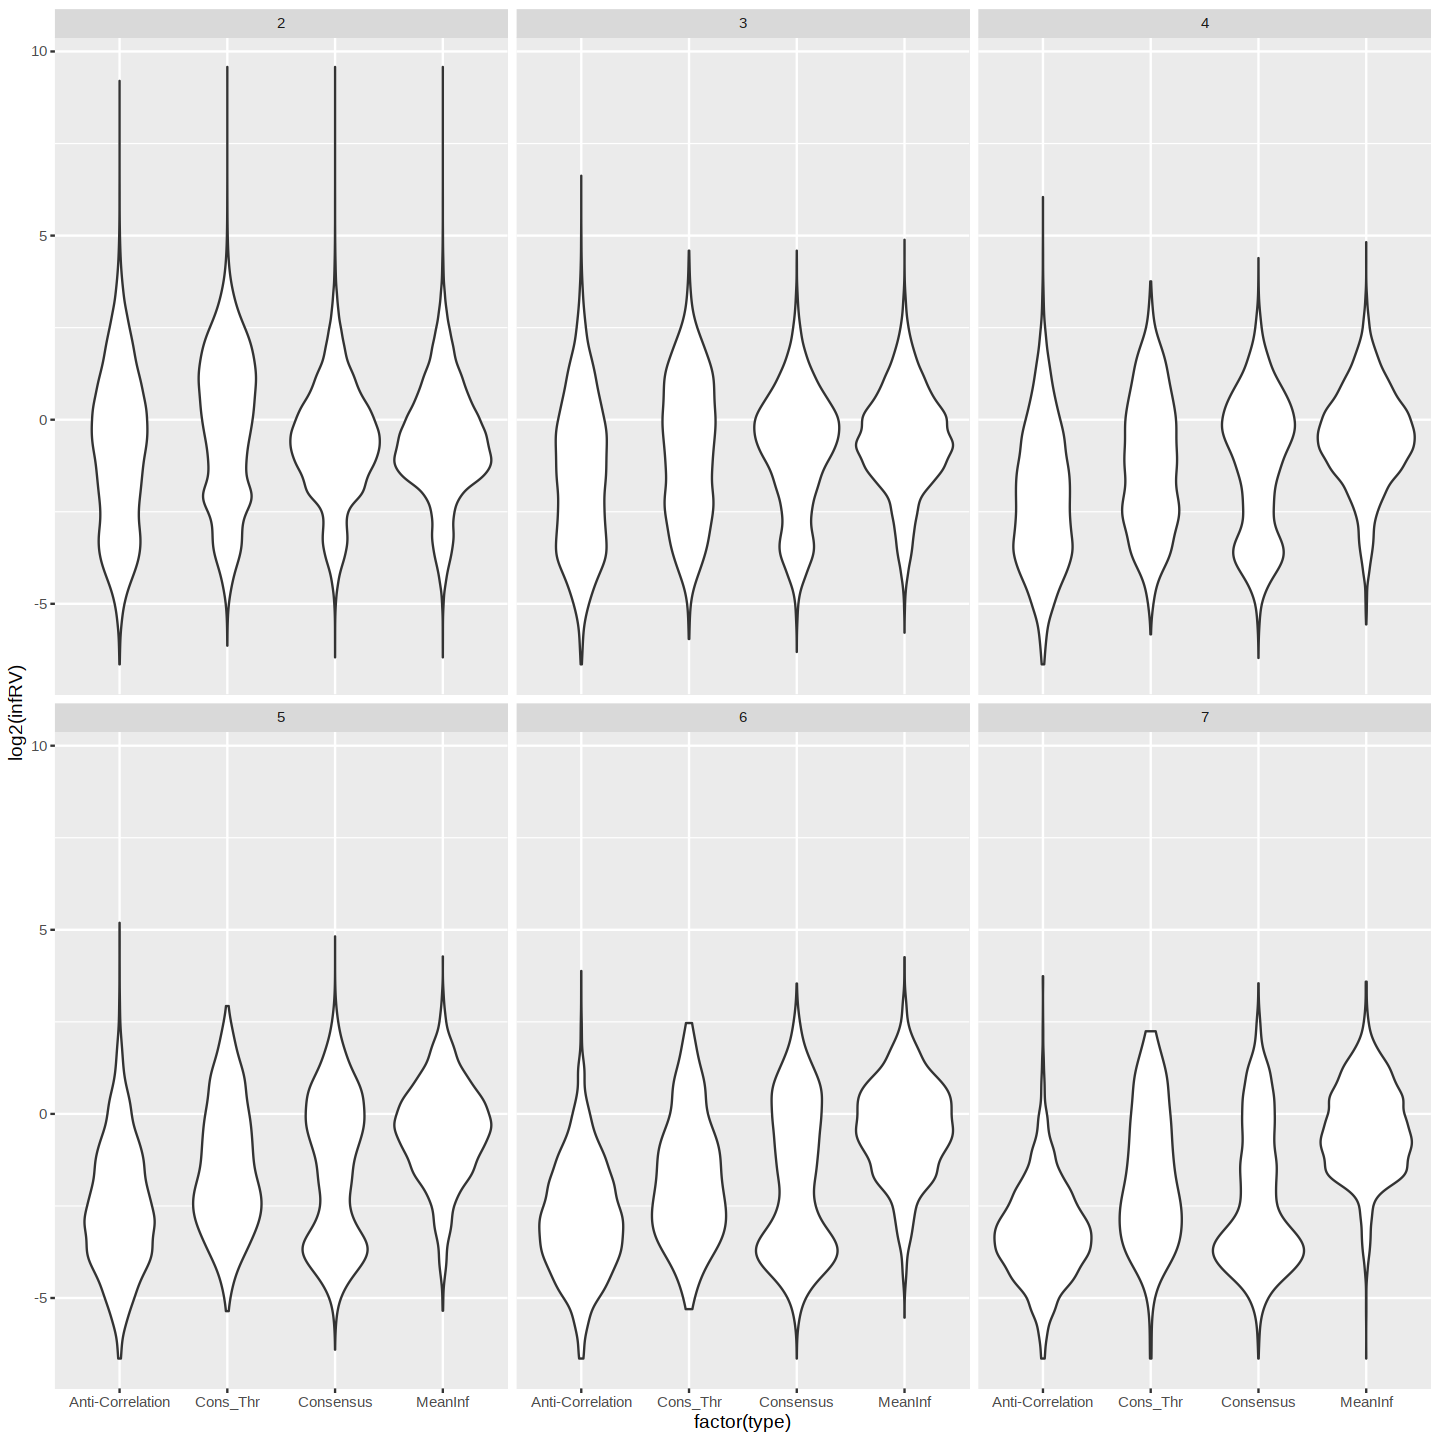

In [12]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [13]:
f <- function(m, p=0.2) {
    mean(m < p)
}
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(m = f(infRV,0.2))
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep, value="infRV", fun.aggregate = f)
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(median(infRV))

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.2879433,0.3856408,0.48266695,0.57993730,0.64046392,0.75875000
2,Cons_Thr,0.1845364,0.2574128,0.31638084,0.35724332,0.41867470,0.42361111
3,Consensus,0.1390663,0.2115659,0.30529761,0.38822987,0.46818262,0.57307827
4,MeanInf,0.1223726,0.1147613,0.09598546,0.09304348,0.08208595,0.05975197


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.5692871,0.3373247,0.2126203,0.1527107,0.1320426,0.1035288
2,Cons_Thr,0.9833658,0.5955306,0.4251591,0.3159727,0.2619290,0.2701154
3,Consensus,0.6443463,0.6458373,0.5664342,0.4138964,0.2545816,0.1353300
4,MeanInf,0.6365508,0.6723235,0.7268124,0.7593662,0.7851414,0.7043206


In [14]:
### Consensus Thr
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Cons_Thr")                

In [15]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus"))

In [16]:
### Mean Inf
innNodes <- length(treeMC$tip)+1:treeMC$Nnode
childNodes <- Descendants(treeMC, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMC$tip)), redInfRV), type="MeanInf"))

In [17]:
### Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))

In [18]:
i <- 1
dfRedInf[146464+221655+202059+length(treeMC$tip)+i,]
mcols(yAggMeanInfNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS)[childNodes[[i]], "meanInfRV"])

,red,type
,<dbl>,<chr>
699877,-0.3786054,Anti-Correlation


129699 
-1.501119

In [19]:
table(dfRedInf$type)


Anti-Correlation         Cons_Thr        Consensus          MeanInf 
          202059           146464           221655           181817 

In [21]:
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInfSub.RData")

In [22]:
sum(dfRedInf$type != dfInfRV$type)
dfInfRV <- cbind(dfInfRV, redInfRV=dfRedInf$red)

[1] 0

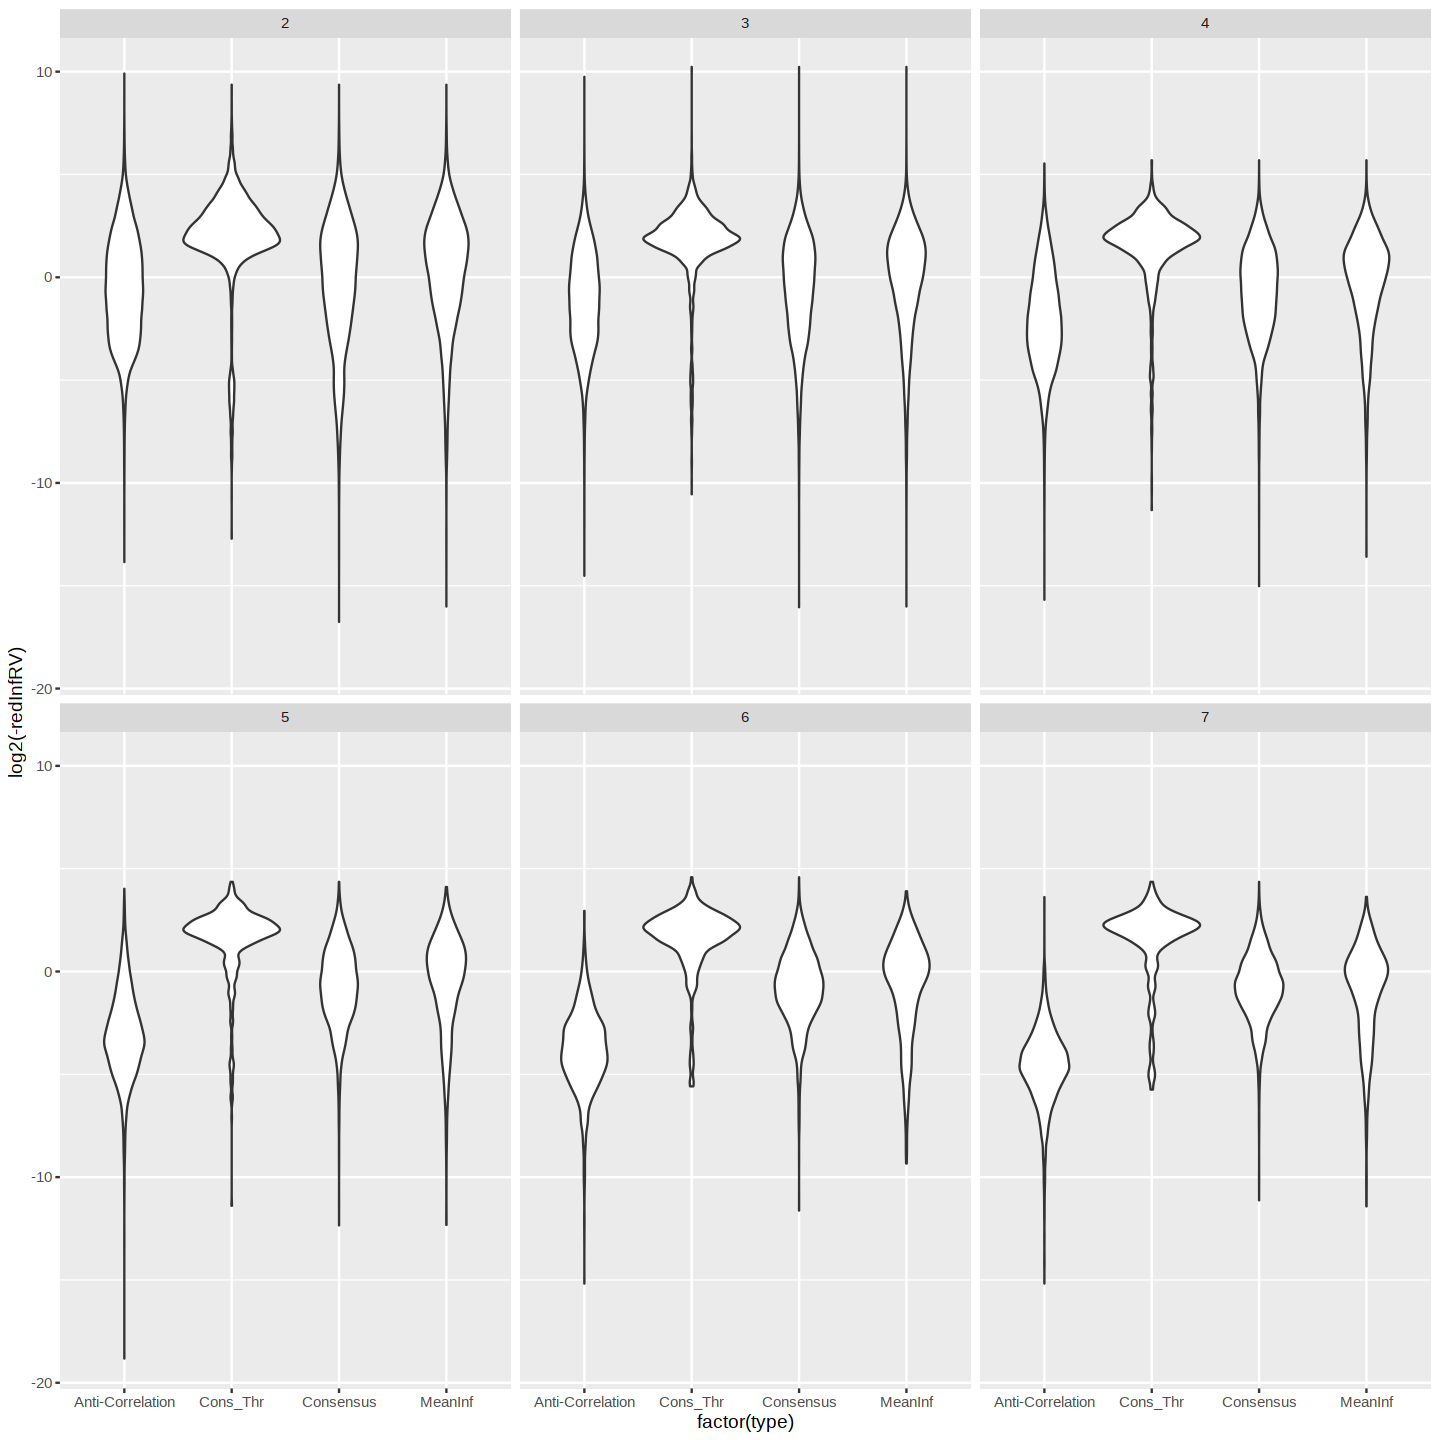

In [23]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [24]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,28375,14977,8315,4693,2629,3254
2,Cons_Thr,9571,3768,1678,705,330,285
3,Consensus,22158,12933,8816,6100,4240,7125
4,MeanInf,17488,7390,3700,2049,1178,2020


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-0.6816157,-0.4792632,-0.2280437,-0.1091124,-0.07063591,-0.0426603
2,Cons_Thr,-4.6575207,-3.8917508,-3.7204377,-3.9641207,-3.98669856,-4.2422890
3,Consensus,-1.0326473,-0.8209601,-0.6812552,-0.6317849,-0.61319632,-0.5997939
4,MeanInf,-1.5950092,-1.2155374,-1.1119794,-0.9378306,-0.86515761,-0.7352472


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-960.9386,-860.6617,-46.37829,-16.26061,-7.701107,-12.29052
2,Cons_Thr,-659.5841,-1200.3043,-51.64566,-20.53549,-23.950825,-20.53545
3,Consensus,-659.5841,-1200.3043,-51.64566,-20.53549,-23.950825,-20.53545
4,MeanInf,-659.5841,-1200.3043,-51.64566,-17.26454,-14.950211,-12.38922
